In [125]:
import numpy as np
import pandas as pd
import os

In [126]:
# loop through all files in "data/good_data" and concatenta them into one dataframe
df = pd.concat([pd.read_csv(f"data/good_data/{file}") for file in os.listdir("data/good_data")])


In [127]:
# drop all columns except for "common_name" "longitude_coordinate" "latitude_coordinate" "condition" "native"
df = df[["condition", "common_name", "longitude_coordinate", "latitude_coordinate", "native"]]
print(df.shape)
df.head()

(93422, 5)


,condition,common_name,longitude_coordinate,latitude_coordinate,native
0,poor,Escarpment live oak,-97.736905,30.273151,naturally_occurring
1,fair,American elm,-97.736577,30.273910,naturally_occurring
2,poor,Escarpment live oak,-97.736597,30.273360,naturally_occurring
3,poor,Pecan,-97.736319,30.273816,naturally_occurring
4,fair,Southern live oak,-97.736167,30.273598,naturally_occurring


<Axes: title={'center': 'Count of occurence of each tree species in dataset'}, xlabel='Tree Species', ylabel='Count'>

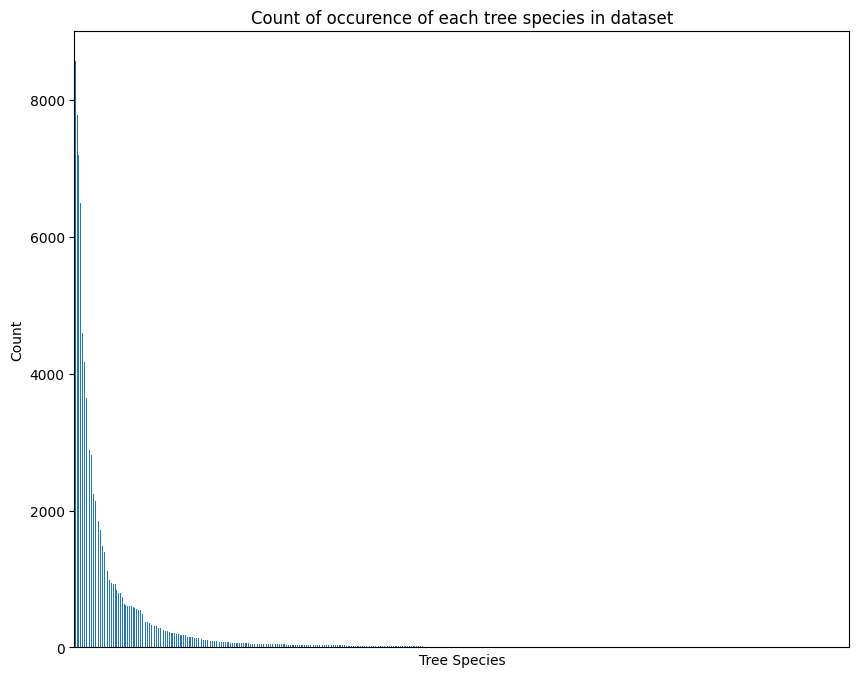

In [128]:
# make a histogram of the count of each label in common_name column
df.common_name.value_counts().plot(kind='bar', figsize=(10,8), 
                                   title="Count of occurence of each tree species in dataset", 
                                   xticks=([]),
                                   ylabel="Count", xlabel="Tree Species")

<Axes: >

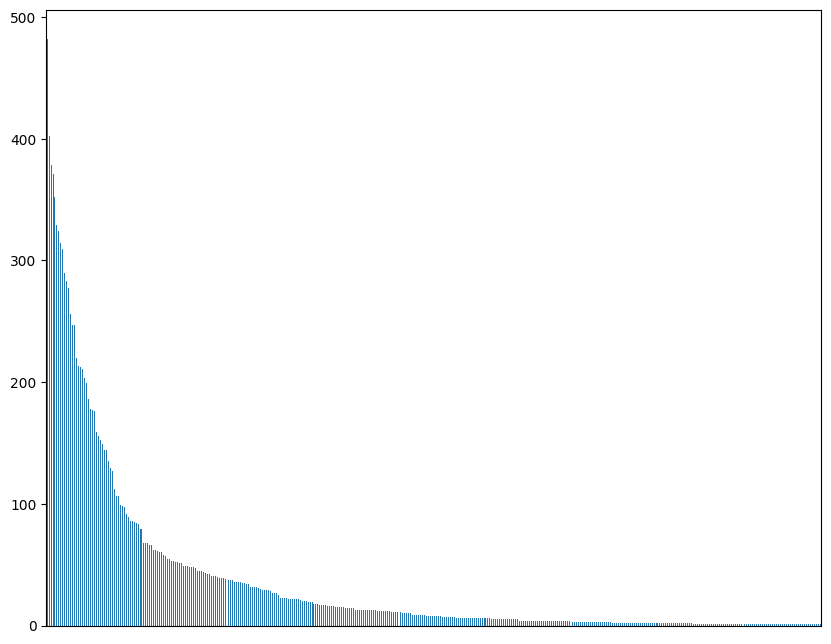

In [129]:
# plot number of occurences in common_name column if they occur less than 500 times on histogram
df.common_name.value_counts()[df.common_name.value_counts() < 500].plot(kind='bar', figsize=(10,8), xticks=([]))

In [130]:
# create a list of common_name labels that occur less than 150 times in the dataset
cut_off = 50
labels_to_drop = df.common_name.value_counts()[df.common_name.value_counts() < cut_off].index.tolist()
print(len(labels_to_drop))

323


In [131]:
# replace all labels in common_name that occur in labels_to_drop with "other"
df.common_name = df.common_name.apply(lambda x: "other" if x in labels_to_drop else x)

In [132]:
# count unique values in common_name column
df.common_name.value_counts()

# rank the labels in common_name column by count
df.common_name.value_counts().rank()

# return the common_name and count for the 100th most common label
df.common_name.value_counts().index[99], df.common_name.value_counts()[99]

('Sharon of rose', 55)

In [133]:
# one hot "common_name" column
df = pd.get_dummies(df, columns=["common_name"])

# one hot 'condition' column
df['condition'] = df['condition'].replace({'excellent': 0, 'good': 1, 'fair': 2, 'poor': 3, 'dead/dying': 4, 'dead': 4})

# one hot native column
df = pd.get_dummies(df, columns=["native"])

# drop native_no_info column
df.drop(columns=['native_no_info'], inplace=True)

# drop rows where condition is null
df = df.dropna(subset=['condition'])

print(df.shape)
df.head()

(91862, 112)


,condition,longitude_coordinate,latitude_coordinate,common_name_American elm,common_name_American hornbeam,common_name_American linden,common_name_American sycamore,common_name_Amur maple,common_name_Apple serviceberry,common_name_Arborvitae,...,common_name_Willow oak,common_name_Yaupon,common_name_Zelkova,common_name_large vacant planting site,common_name_medium vacant planting site,common_name_other,common_name_small vacant planting site,common_name_tree,native_introduced,native_naturally_occurring
0,3.0,-97.736905,30.273151,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,-97.736577,30.273910,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3.0,-97.736597,30.273360,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,-97.736319,30.273816,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.0,-97.736167,30.273598,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [134]:
# drop rows

In [135]:
# save to csv
df.to_csv("small_set_processed_data.csv", index=False)